<a href="https://colab.research.google.com/github/Airukua/Ode/blob/main/OdeonPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def svir_model(t,y,k,miu,miuc,alpha,beta,gamma,psi) :
   y= S,I,R,V
   dSdt = k-miu*S-alpha*S*I-psi*S
   dIdt = alpha*S*I-(miuc+miu)*I-beta*I
   dRdt = beta*I - miu*R - gamma*R
   dVdt = gamma*R - miu*V + psi*S
   return [dSdt,dIdt,dRdt,dVdt]

In [ ]:
#nilai awal
S = 1835776
I = 61
R = 1134
V = 25646

In [ ]:
#parameter
k = 0.10687
alpha = 0.00002
beta = 0.00009
gamma = 0.00413
psi = 0.00404
miu = 0.00126
miuc = 0.09677
h = 1

In [ ]:
import numpy as np

y0 = [S, I, R, V]   # kondisi awal

# Waktu simulasi
t0 = 0       # waktu awal
tf = 200     # waktu akhir
tstep = 0.1  # interval waktu
tspan = np.arange(t0, tf, tstep)  # array interval waktu

In [ ]:
#rungge kutta 4
def rk4_step(f, t, y, h, *args):
    k1 = h * np.array(f(t, y, *args))
    k2 = h * np.array(f(t + h/2, y + k1/2, *args))
    k3 = h * np.array(f(t + h/2, y + k2/2, *args))
    k4 = h * np.array(f(t + h, y + k3, *args))
    return y + (k1 + 2*k2 + 2*k3 + k4) / 6

In [ ]:
results = []
y = y0
for t in tspan:
   y = rk4_step(svir_model, t, y, h, k, miu, miuc, alpha, beta, gamma, psi)
   results.append(y)

In [ ]:
results

[array([1.82380685e+06, 2.29466140e+03, 1.12789323e+03, 3.30349045e+04]),
 array([1.81183769e+06, 4.52832280e+03, 1.12178646e+03, 4.04238090e+04]),
 array([1.79986854e+06, 6.76198420e+03, 1.11567969e+03, 4.78127135e+04]),
 array([1.78789939e+06, 8.99564560e+03, 1.10957292e+03, 5.52016180e+04]),
 array([1.77593024e+06, 1.12293070e+04, 1.10346615e+03, 6.25905225e+04]),
 array([1.76396108e+06, 1.34629684e+04, 1.09735938e+03, 6.99794270e+04]),
 array([1.75199193e+06, 1.56966298e+04, 1.09125261e+03, 7.73683315e+04]),
 array([1.74002278e+06, 1.79302912e+04, 1.08514584e+03, 8.47572360e+04]),
 array([1.72805363e+06, 2.01639526e+04, 1.07903907e+03, 9.21461405e+04]),
 array([1.71608447e+06, 2.23976140e+04, 1.07293230e+03, 9.95350450e+04]),
 array([1.70411532e+06, 2.46312754e+04, 1.06682553e+03, 1.06923950e+05]),
 array([1.69214617e+06, 2.68649368e+04, 1.06071876e+03, 1.14312854e+05]),
 array([1.68017702e+06, 2.90985982e+04, 1.05461199e+03, 1.21701759e+05]),
 array([1.66820786e+06, 3.13322596e+04

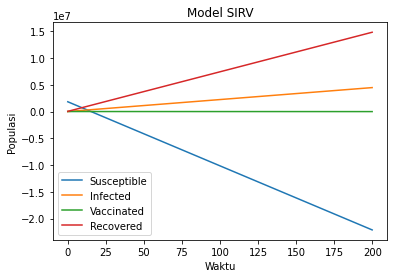

In [ ]:
import matplotlib.pyplot as plt
# Mendefinisikan waktu yang akan dipakai untuk plotting
time = [t for t in tspan]

# Memecah hasil simulasi menjadi array s, i, v, dan r
s = [result[0] for result in results]
i = [result[1] for result in results]
v = [result[2] for result in results]
r = [result[3] for result in results]

# Memplot hasil simulasi
plt.plot(time, s, label='Susceptible')
plt.plot(time, i, label='Infected')
plt.plot(time, v, label='Vaccinated')
plt.plot(time, r, label='Recovered')
plt.legend()
plt.xlabel('Waktu')
plt.ylabel('Populasi')
plt.title('Model SIRV')
plt.show()